## **Machine Learning Attempt 4: Support Vector Machine (SVM)**

In this notebook, we attempt to see if another algorithm (SVM) is able to give us a better model after trying both Decision Tree and Random Forest. 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
machine_learning_data_ohe_up = pd.read_csv("datasets\\machine-learning-data-ohe-upsampled.csv")
machine_learning_data_ohe_up = machine_learning_data_ohe_up[['Pclass', 'Alone', 'Fare', 'Parch', 'Family_Size', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived']]
machine_learning_data_ohe_up

,Pclass,Alone,Fare,Parch,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,0,7.2500,0,2,0.0,1.0,0.0,0.0,1.0,0
1,3,1,8.0500,0,1,0.0,1.0,0.0,0.0,1.0,0
2,3,1,8.4583,0,1,0.0,1.0,0.0,1.0,0.0,0
3,1,1,51.8625,0,1,0.0,1.0,0.0,0.0,1.0,0
4,3,0,21.0750,1,5,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1093,1,0,211.3375,1,2,1.0,0.0,0.0,0.0,1.0,1
1094,1,0,52.5542,1,3,1.0,0.0,0.0,0.0,1.0,1
1095,3,1,9.5000,0,1,0.0,1.0,0.0,0.0,1.0,1
1096,1,0,55.4417,0,2,0.0,1.0,1.0,0.0,0.0,1


In [3]:
from sklearn.svm import SVC
y = pd.DataFrame(machine_learning_data_ohe_up['Survived'])
X = pd.DataFrame(machine_learning_data_ohe_up.drop('Survived', axis = 1))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =13)

Train Data
Accuracy  :	 0.6302083333333334

TPR Train :	 0.5732647814910026
TNR Train :	 0.6886543535620053

FPR Train :	 0.3113456464379947
FNR Train :	 0.4267352185089974


<AxesSubplot:>

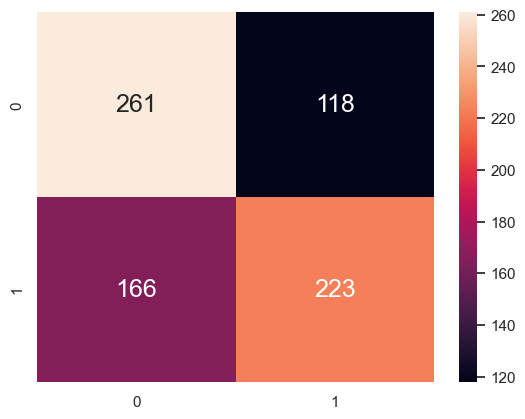

In [6]:
model = SVC()
model.fit(X_train, y_train)
  
y_train_pred = model.predict(X_train)
print("Train Data")
print("Accuracy  :\t", model.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6575757575757576

TPR Test :	 0.60625
TNR Test :	 0.7058823529411765

FPR Test :	 0.29411764705882354
FNR Test :	 0.39375


<AxesSubplot:>

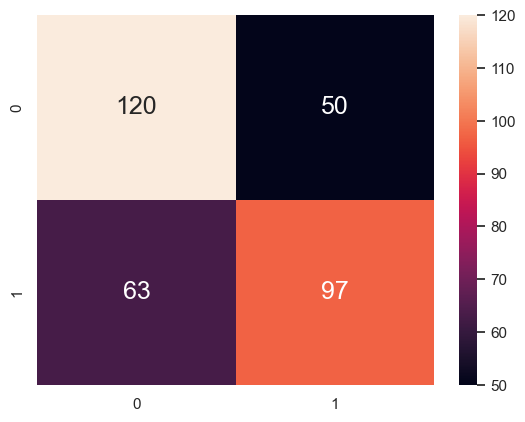

In [7]:
print("Test Data")
print("Accuracy  :\t", model.score(X_test, y_test))
print()

y_test_pred = model.predict(X_test)
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1]
tnTest = cmTest[0][0]
fnTest = cmTest[1][0]

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


The default parameters of SVM gave us quite a bad model of only accuracy in the 60+% range for both train and test, and also a much higher FPR and FNR. We would like to explore if tuning hyperparameters will provide us with a better result.

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)

grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [11]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


Train Data
Accuracy  :	 0.9309895833333334

TPR Train :	 0.910025706940874
TNR Train :	 0.9525065963060686

FPR Train :	 0.047493403693931395
FNR Train :	 0.08997429305912596


<AxesSubplot:>

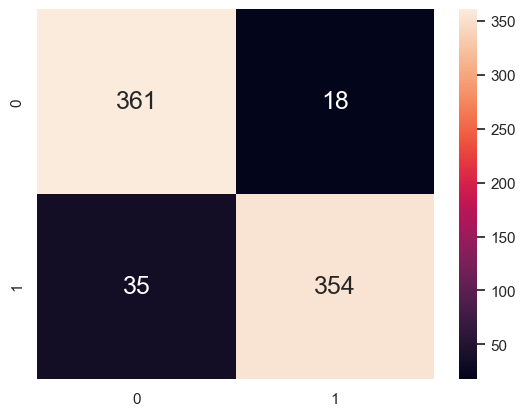

In [14]:
model = SVC(C= 100, gamma= 1, kernel= 'rbf')
model.fit(X_train, y_train)
  
y_train_pred = model.predict(X_train)
print("Train Data")
print("Accuracy  :\t", model.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8484848484848485

TPR Test :	 0.79375
TNR Test :	 0.9

FPR Test :	 0.1
FNR Test :	 0.20625


<AxesSubplot:>

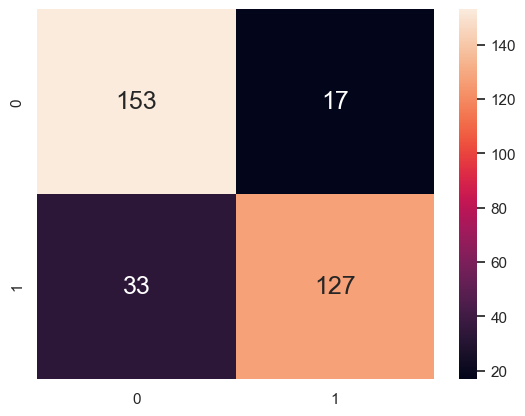

In [16]:
print("Test Data")
print("Accuracy  :\t", model.score(X_test, y_test))
print()
y_test_pred = model.predict(X_test)

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

We got a much better result after tuning the hyperparameters, improving the accuracy of the train data to 93.2% and its FPR and FNR to 4.5% and 9% respectively. The TPR and TNR has also been improved to 91% and 95.5% respectively. 

As for the test data, its accuracy has been improved to 84.8% and its FPR and FNR to 10% and 20.6% respectively. Additionally, its TPR and TNR are 79.3% and 90%.

Comparing with that of Random Forest, SVM test model has a higher accuracy of 84.8% versus 82.4% in Random Forest. The FPR and FNR are also lower with 10% versus 15.3% and 20.6% and 20%, suggesting to be less error prone. Furthermore, the TPR is very slightly worse with 79.3% versus 80% and the TNR is better with 90% versus 84.7%.

As such, we see that after hyperparameter tuning, SVM is a slightly better model than Random Forest.